# はじめに

実際のデータ解析では、何らかの理由でデータが不完全な形でしか得られないことがよくある。  
データが観測されないことを**欠測**もしくは欠損、欠落などという。  
全部で$p$種類の変量(測定項目)に対して$n$個分のデータを観測するとし、$x_{ij}$を第$i$番目の個体の第$j$変量の値とする。  
そして、それらを第$(i,j)$要素とする$n \times p$行列$X=\{x_{ij}\}$の各要素の値が全て得られている時、データは**完全**であるという。  
それに対し、$X$のいくつかの要素が得られていない時、データは**不完全**であるという。  
そして、不完全データを何らかの方策によって擬似的に完全な形としたものを**擬似完全**データという。  
不完全データへの対処法は、データ行列$X$に対しどのような分析を行うのかに依存する。

不完全データへの対処では、欠測のメカニズムを知ることが重要である。
**欠測メカニズム**は、次のように分類される。

(a)MCAR(Missing Completely At Random)：  
欠測は、欠測データ及び観測データの両方に依存せず、ランダムに生じる

In [1]:
# MCARデータを作成
import pandas as pd

mcar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[None, 90, 85, None, 75, None, 60, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mcar_df

,class,score,score_perfect
0,A,NaN,98
1,B,90.0,90
2,A,85.0,85
3,A,NaN,80
4,B,75.0,75
5,B,NaN,73
6,A,60.0,60
7,B,NaN,54


ランダムに欠損が存在する。

(b)MAR(Missing At Random)：  
欠測は、観測データに依存して生じるが、欠測データの値によらない

In [2]:
# MARデータを作成
mar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[98, None, 85, 80, None, None, 60, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mar_df

,class,score,score_perfect
0,A,98.0,98
1,B,NaN,90
2,A,85.0,85
3,A,80.0,80
4,B,NaN,75
5,B,NaN,73
6,A,60.0,60
7,B,NaN,54


class Bに欠測が集中している。

(c)MNAR(Missing Not At Random)：  
欠測は、欠測データの値そのものの値に依存して生ずる

In [3]:
# MNARデータを作成
mnar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[98, 90, 85, 80, None, None, None, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mnar_df

,class,score,score_perfect
0,A,98.0,98
1,B,90.0,90
2,A,85.0,85
3,A,80.0,80
4,B,NaN,75
5,B,NaN,73
6,A,NaN,60
7,B,NaN,54


scoreが低いほうに欠測が集中している。

# 削除法と補完法

不完全データから擬似的な完全データを作成するには、欠測のある個体を削除する**削除法**と、欠測箇所に何らかの値を代入する**補完法**(**代入法**)がある。  
削除法の中で、多変量データで1箇所でも欠測のある個体は個体ごと削除し、全ての変量が観測されている個体のみを用いる解析法を**CC**(**Complete Case**)**解析**という。  
それに対し、例えばある変量の平均値の計算では別の変量の観測・欠測は無関係であり、相関係数の計算では2つの変量さえ両方とも観測されていればよいことから、当該変量の計算では使えるデータは全部使うという**AC**(**Available Case**)**解析**がある。  
欠測値に何らかの値を代入する補完法では、どのような値を欠測箇所に代入するかの選択肢があり、以下がよく用いられる。  
(ⅰ)平均値代入：当該変量の観測データのみから求めた平均値を代入  
(ⅱ)回帰代入：回帰式によって欠測部分を予測して代入  
(ⅲ)Hot Deck法：欠測のあるサンプルと類似のサンプルを同じデータセットから探し出して、その観測データを欠測部分に代入

# 正規分布における推測(1変量正規分布)

1変量データでは、欠測メカニズムはMCARかMNARのいずれかとなる。  
欠測メカニズムがMCARの時は、サイズ$n$のランダムサンプルを得る計画だったが、$m$個しかデータが得られなかったとしても、観測された$m$個のデータのみを用いて統計的な分析を行なっても問題はない。  
観測データのランダムネスは保たれるからである。  
しかし、欠測が観測されるべき値に依存する場合は、その限りではなく、欠測した理由を加味した分析が必要となる。  
例えば、ある既知の定数$c$があり、$c$を超えた観測データが得られないような状況である。これはMNARの一つである。  
ここでさらに、$c$を超えて観測されないデータの個数の情報がある場合とない場合の区別が生じる。  
全部で$n$個のデータを観測する計画を立てたが、$c$以下で実際に観測されたデータは$m$個であり、観測されなかった個数は$n-m$個であることがわかっている時、データは$c$で**打ち切り**になったという。  
一方、$c$以下で$m$個のデータが観測されたが$c$を超えたデータの個数が不明の時、データは**トランケート**されたという。  
打ち切りとトランケートの違いは、パラメータを推定する上で大きく影響するので注意する必要がある。

# 正規分布における推測(2変量正規分布)

$2$変量確率変数$(X,Y)$は$2$変量正規分布$N(\mu_X,\mu_Y,\sigma_X^2,\sigma_Y^2,\sigma_{XY}), \rho=\sigma_{XY}/(\sigma_X \sigma_Y)$に従うとし、その同時確率密度関数を$f(x,y)$とする。  
欠測メカニズムがMCARであれば、削除法を適用し$\mu_Y$の推定値は観測データの標本平均$\bar{y}$とし、相関係数$\rho$の推定値は標本相関係数$r$とすれば良い。   
欠測メカニズムがMARの場合には、$x$を与えた時の$y$の条件つき推測では$y$の欠測は完全にランダムとなることを利用して推測を行う。  
欠測メカニズムがMNARの場合には、$x$を与えた時の$y$の欠測メカニズムをモデル化しておく必要がある。分析は容易ではない。

# EMアルゴリズム

MARの状況で、欠測値のあるデータからパラメータの最尤推定値を求める一般的なアルゴリズムが**EMアルゴリズム**である。  
データが$X$と$Y$の$2$つの部類に分かれ、$Y=y$のみが観測され、$X$が欠測したとする。  
$(X,Y)$の同時確率密度関数を$f(x,y;\theta)$とすると、$y$の周辺確率密度関数は$f(y;\theta)=\int f(x,y;\theta)dx$である。  
これを$\theta$の尤度関数として、反復計算により最大化したい。  
EMアルゴリズムでは、以下の**E-ステップ**と**M-ステップ**を交互に繰り返す。  
E-ステップ:$\theta$の現在の値を$\theta^*$として、$\theta^*$のもとで完全データの対数尤度比の条件付き期待値$q(\theta|\theta^*)$を次式で計算する。
$$
q(\theta|\theta^*) = \int \log \frac{f(x,y;\theta)}{f(x,y;\theta^*)}f_{X|Y}(x|y;\theta^*)dx
$$
M-ステップ:$q(\theta|\theta^*)$を$\theta$について最大化する。  
E-ステップとM-ステップを行うと尤度が必ず非減少となることが示されるので、EMアルゴリズムが収束すれば尤度関数の極大値に到達する。

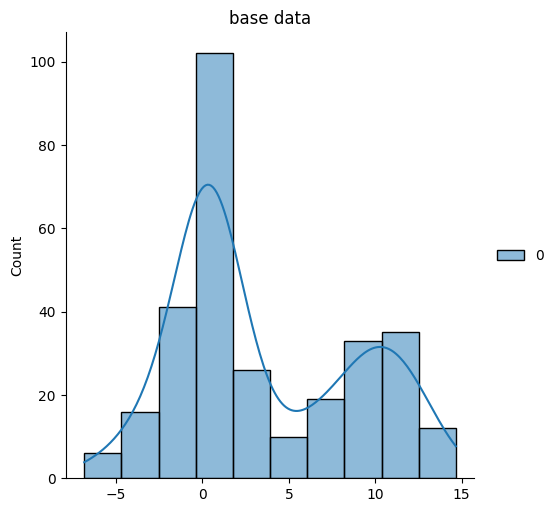

In [4]:
# EMアルゴリズムを実行
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# まずは学習させたいデータを描画
x1 = np.random.normal(loc=0.5, scale=1 , size =100).reshape(-1,1)
x2 = np.random.normal(loc=10, scale=2 , size =100).reshape(-1,1)
x3 = np.random.normal(loc=0, scale=3 , size =100).reshape(-1,1)
x = np.concatenate([x1 , x2 , x3])
sns.displot(data=x, kde=True)
plt.title("base data")
plt.show()

In [5]:
# 初期パラメータ
mu = np.array([0, 10, 3])
sig = np.array([1, 5, 10])
pi = np.array([0.1, 0.4, 0.5])
print(f"初期パラメータ mu:{mu}, sig:{sig}, pi:{pi}")

# 学習パラメータ
iter_num = 100
e_val = 0.01
LF = 0

for i in range(iter_num):
    # 正規分布の値を取得
    gaus_val = np.exp( - pow((x-mu), 2) /(2*sig) )/np.sqrt(2*np.pi*sig)
    
    # ----- E-ステップ ----- #
    # 事後分布の計算
    gamma_val = pi * gaus_val
    gamma_val = gamma_val/np.sum(gamma_val, axis=1).reshape(len(x),1)
    N_k = np.sum(gamma_val, axis=0)
    N = np.sum(N_k)

    # ----- M-ステップ ----- #
    LF_new = np.sum(np.log(np.sum(pi*gaus_val, axis=1)))
    ch = LF_new - LF
    if i%5==0:
        print(f"iter_num={i}, LF={LF_new}, change={ch}")

    # e_val以下になるまで尤度を更新
    if np.abs(ch) < e_val:
        print(f"iter_num={i}, LF={LF_new}, change={ch}")
        print(f"Iteration is finished {i+1} iter. ")
        break
    LF = LF_new

    # パラメータの更新
    mu_k = np.sum(x*gamma_val, axis=0) / N_k
    sig_k = np.sum(gamma_val*pow(x-mu, 2), axis=0) / N_k
    pi_k = N_k / N
    
    pi = pi_k
    mu = mu_k
    sig = sig_k

print(f"更新後パラメータ mu:{mu}, sig:{sig}, pi:{pi}")


初期パラメータ mu:[ 0 10  3], sig:[ 1  5 10], pi:[0.1 0.4 0.5]
iter_num=0, LF=-890.2571174841755, change=-890.2571174841755
iter_num=5, LF=-820.9398431035568, change=0.39936717404964384
iter_num=10, LF=-820.0777496184558, change=0.09600521967217901
iter_num=15, LF=-819.8444779649269, change=0.0256033007269707
iter_num=19, LF=-819.7886770919584, change=0.00916044553912343
Iteration is finished 20 iter. 
更新後パラメータ mu:[ 0.32741894 10.10323433  0.07488616], sig:[0.64745293 4.49251756 9.38785807], pi:[0.31901372 0.33111265 0.34987363]


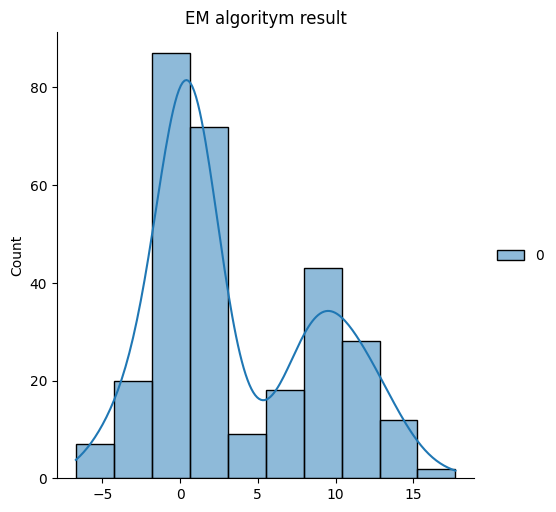

In [6]:
# 推定データを描画
x_pred1 = np.random.normal(loc=mu[0], scale=np.sqrt(sig)[0] , size =int(300*pi[0]) ).reshape(-1,1)
x_pred2 = np.random.normal(loc=mu[1], scale=np.sqrt(sig)[1] , size =int(300*pi[1]) ).reshape(-1,1)
x_pred3 = np.random.normal(loc=mu[2], scale=np.sqrt(sig)[2] , size =int(300*pi[2]) ).reshape(-1,1)
x_pred = np.concatenate([x_pred1, x_pred2, x_pred3])
sns.displot(data=x_pred, kde=True)
plt.title("EM algoritym result")
plt.show()

学習元データと同じような確率密度分布を描画することができた